In [1]:
import numpy as np
from matplotlib import pyplot as plt

from watersort.helpers import WaterPuzzleSolver, WaterPuzzleState

In [63]:
def get_winnable_nodes(solver):
    winning_node = [e for e in solver.nodes if all(len(set(f)) == 1 for f in e)][0]
    
    nodes_that_can_win = [winning_node]
    
    edges_by_e2 = {}
    for e1, e2 in solver.edges:
        if e2 not in edges_by_e2:
            edges_by_e2[e2] = set()
        edges_by_e2[e2].add(e1)
    
    i = 0
    while i < len(nodes_that_can_win):
        node = nodes_that_can_win[i]
        #new_nodes = [e1 for e1, e2 in solver.edges if e2 == node]
        for node in edges_by_e2.get(node, []):
            if node not in nodes_that_can_win:
                nodes_that_can_win.append(node)
        
        i += 1

    return i

In [6]:
all_results = []
for num_colors in range(2, 10):
    print("COLORS:", num_colors)
    color_results = []
    for i in range(50):
        initial_state = WaterPuzzleState.new_random(num_colors=num_colors)
        solver = WaterPuzzleSolver(initial_state)
        solver.solve()
        color_results.append((
            len(solver.solve_instructions),
            len(solver.nodes),
            len(solver.edges),
        ))
    print(color_results)
    all_results.append(color_results)
pass

COLORS: 2
[(0, 0, 0), (6, 22, 54), (4, 13, 31), (3, 7, 15), (5, 31, 88), (4, 22, 56), (4, 18, 43), (4, 18, 44), (6, 22, 54), (6, 22, 54), (5, 33, 97), (4, 16, 40), (4, 16, 40), (7, 40, 121), (3, 7, 15), (4, 18, 44), (0, 0, 0), (0, 0, 0), (4, 22, 56), (5, 37, 109), (5, 32, 96), (7, 67, 221), (3, 7, 15), (0, 0, 0), (4, 13, 31), (4, 13, 31), (6, 38, 112), (4, 22, 56), (3, 7, 15), (4, 13, 31), (5, 31, 88), (4, 18, 44), (6, 50, 158), (3, 7, 15), (4, 22, 56), (4, 13, 31), (5, 31, 85), (3, 7, 15), (3, 7, 15), (7, 40, 121), (3, 7, 15), (4, 18, 43), (5, 33, 93), (5, 37, 109), (5, 33, 97), (5, 32, 96), (7, 67, 221), (5, 32, 96), (4, 22, 56), (4, 16, 40)]
COLORS: 3
[(6, 57, 167), (8, 131, 402), (3, 6, 12), (7, 103, 296), (9, 152, 461), (8, 182, 578), (6, 57, 169), (9, 131, 404), (8, 111, 338), (7, 110, 330), (10, 213, 782), (8, 82, 242), (7, 119, 385), (10, 188, 607), (10, 289, 973), (10, 217, 716), (9, 153, 478), (8, 139, 434), (10, 128, 382), (8, 181, 594), (8, 120, 370), (7, 111, 335), (9, 146

KeyboardInterrupt: 

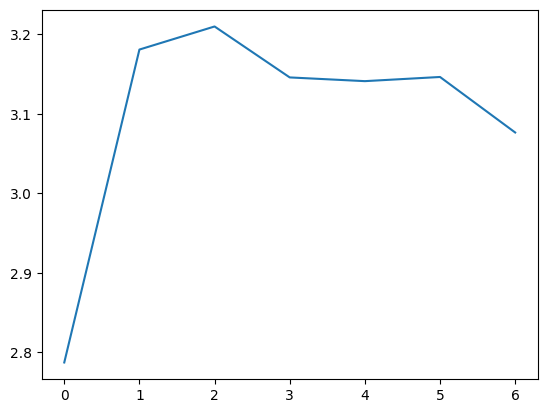

In [24]:
plt.plot(
    np.mean(np.array(all_results)[:,:,2], axis=1) /
    np.mean(np.array(all_results)[:,:,1], axis=1)
)

In [89]:
for i in range(20):
    initial_state = WaterPuzzleState.new_random(num_colors=8)
    solver = WaterPuzzleSolver(initial_state)
    solver.solve()
    print(get_winnable_nodes(solver) / len(solver.nodes))

0.8878802357063227
0.8235956205873325
0.9175126903553299
0.823432827068551
0.8636957231472413
0.9129863567458312
0.9699702407791505
0.8702397743300423
0.8759371221281741
0.9300217803695637
0.9360707517372079


KeyboardInterrupt: 

In [ ]:
for i in range(20):
    initial_state = WaterPuzzleState.new_random(num_colors=10)
    solver = WaterPuzzleSolver(initial_state)
    solver.solve()
    print(get_winnable_nodes(solver) / len(solver.nodes))

0.8684332598863505
0.5457433290978398
0.8715723786098205
0.793265503875969
0.7204866041844173
0.7788691724869814
0.7366111756355659
0.7082136703044227
0.7705373288555929
0.8628192167377258
0.7841813359054738
0.8696319018404908
0.7878019683865195
0.7345949951547626
0.7175856929955291
